**Objetivo do Notebook**: 

Este notebook apresenta uma análise exploratória voltada para o desenvolvimento de modelos de machine learning, realizada sobre uma base de dados contendo o histórico acadêmico dos alunos.

**Objetivo da análise**:

O objetivo da análise é proporcionar um entendimento geral dos alunos, permitindo conhecer melhor o conjunto de dados e suas características.

Busca-se também a verificação da conformidade da base de dados, identificando a presença de valores faltantes, duplicados, outliers e outras discrepâncias.

Este projeto visa desenvolver um modelo de machine learning capaz de estimar a probabilidade de um aluno conseguir emprego a partir de seu histórico escolar. Dessa forma, a análise pretende identificar características que possam auxiliar na criação da pipeline de pré-processamento e no treinamento do modelo. Por exemplo, podem existir vieses nos dados: será que a quantidade de projetos, a participação em workshops e as atividades extracurriculares não carregam vieses que podem "confundir" nossos modelos?

Assim, buscamos compreender o conjunto de dados para que essa análise contribua para as etapas subsequentes à criação do modelo.



# Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['figure.figsize'] = 12 , 6

nao_colocar_color = '#5a5c69'

colocado_color = '#0056b3'

# Carregando dados

In [2]:
data = pd.read_csv('../data/train.csv')

# Conhecendo a base de dados

In [3]:
data.head()

,cgpa,internships,projects,workshops_certifications,aptitude_test_score,soft_skills_rating,extra_curricular_activities,placement_training,ssc_marks,hsc_marks,n_job_applications,personality_type,placement_status,student_id
0,8.40,2,2,0,74,4.40,Yes,No,79,85,4,2,0,4085
1,7.60,1,2,1,75,4.30,Yes,Yes,80,67,7,4,1,2992
2,7.60,1,2,1,61,3.20,No,No,61,57,7,2,0,8623
3,7.50,1,2,0,78,4.40,Yes,Yes,61,71,7,2,0,8811
4,8.45,2,3,2,82,4.89,Yes,Yes,75,93,23,3,1,10072


In [4]:
pessoas = data.shape[0]

atributos = data.shape[1]

print(f"Há {pessoas} pessoas com cada uma tendo {atributos} atributos")

Há 9200 pessoas com cada uma tendo 14 atributos


Aqui vale uma breve observação sobre os atributos e seus respectivos significados:

* **cgpa (Cumulative Grade Point Average):**  Média geral das notas alcançadas pelo estudante. 
 
      Obs: Talvez possa ser entendido como um coeficiente de rendimento do aluno. Aparentemente, cada instituição pode ter sua maneira de calcular o gpa.
* **internships:**  Quantidade de estágios que o estudante realizou.
* **projects:** Quantidade de projetos desenvolvidos pelo estudante.
* **workshops_certifications:** Quantidade de cursos e certificações realizadas pelo estudante.
* **aptitude_test_score:** Nota em testes de aptidão, que avaliam raciocínio lógico e quantitativo. 
      
      Obs: Quanto maior melhor ?
* **soft_skills_rating:** Avaliação de habilidades interpessoais e comunicação. 

      Obs: Quanto maior melhor?
* **extra_curricular_activities:**  Indica o nível de participação do estudante em atividades extracurriculares.
* **placement_training:** Indica se o estudante participou do treinamento de colocação profissional oferecido pela faculdade.
* **ssc_marks (Secondary School Certificate Marks)** Notas do ensino secundário, seria algo entre o ensino fundamental e o ensino médio.
* **hsc_marks (Higher Secondary certificate Marks):** Similar ao nosso ensino médio.
* **n_job_applications:** Número de vagas que o estudante se candidatou.
* **personality_type:** Tipo de personalidade do estudante (variável categórica). 

      Obs: Apesar de ser representado como um número, essa variável é categórica. Não sabemos o que seria uma personalidade 1,2, 3 e 4. 
* **placement_status:** Esse é o nosso target, indica se o estudante conseguiu um emprego (1 = colocado, 0 = não colocado).
* **Student id:** Identificação única de cada estudante

# Verificando a conformidade do dataset

Há valores nulos ? 

R: Não

In [5]:
print(f"Quantidade absoluta de valores nulos: {data.isna().sum().sum()}")

Quantidade absoluta de valores nulos: 0


Há valores duplicados ?

R: Não

In [6]:
print(f"Quantidade absoluta de valores duplicados: {data.duplicated().sum()}")

Quantidade absoluta de valores duplicados: 0


O pandas fez a inferência correta dos tipos de cada coluna da base ?

R: Aparentemente sim. Como temos poucas colunas, conseguimos visualizar facilmente pelo método .info().

Entretanto, há possibilidade de melhorias. O pandas aloca memória além do necessário para as colunas. Por exemplo, todas as colunas do tipo inteiro não vão além do valor 4, mas mesmo assim estão com o tipo int64. 

O tipo int64 abrange valores de  -9223372036854775808 a 9223372036854775807.

Para o nosso dataset, um int8 seria mais do que o suficiente. 

O tipo int8 abrange valores de -128 a 127.


O mesmo é valido para os valores float64. Neste caso, um float16 seria suficiente.

Para as colunas do tipo object, poderiamos substituir por categorical.

Todas essas melhorias são possíveis, entretanto, o dataset atual ocupa irrisórios 1.7MB. Não precisamos nos preocupar com esses tipos superestimados. Não sofreremos com lentidão e nem com falta de memória.

In [7]:
data.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9200 entries, 0 to 9199
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cgpa                         9200 non-null   float64
 1   internships                  9200 non-null   int64  
 2   projects                     9200 non-null   int64  
 3   workshops_certifications     9200 non-null   int64  
 4   aptitude_test_score          9200 non-null   int64  
 5   soft_skills_rating           9200 non-null   float64
 6   extra_curricular_activities  9200 non-null   object 
 7   placement_training           9200 non-null   object 
 8   ssc_marks                    9200 non-null   int64  
 9   hsc_marks                    9200 non-null   int64  
 10  n_job_applications           9200 non-null   int64  
 11  personality_type             9200 non-null   int64  
 12  placement_status             9200 non-null   int64  
 13  student_id        

Há outliers ?

R: A principio não.

Através do método .describe() podemos ter um boa noção dos intervalos de valores para cada coluna. Inicialemente não encontramos nenhum indicio da presença de outliers. As colunas mais prováveis de encontramos outliers são as do tipo float. Entretanto, isso é esperado, pois sempre há estudantes fora da curva, tanto para cima quanto para baixo.

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
cgpa,9200.0,7.697162,0.644766,5.89,7.40,7.7,8.20,9.43
internships,9200.0,1.052065,0.666472,0.00,1.00,1.0,1.00,2.00
projects,9200.0,2.026196,0.868747,0.00,1.00,2.0,3.00,3.00
workshops_certifications,9200.0,1.016304,0.904360,0.00,0.00,1.0,2.00,3.00
aptitude_test_score,9200.0,79.448478,8.188742,59.00,73.00,80.0,87.00,96.00
soft_skills_rating,9200.0,4.324291,0.413076,2.98,4.00,4.4,4.70,5.28
ssc_marks,9200.0,69.109565,10.446232,50.00,59.00,70.0,78.00,96.00
hsc_marks,9200.0,74.526630,8.956924,55.00,67.00,73.0,83.00,95.00
n_job_applications,9200.0,16.537391,8.087944,3.00,10.00,17.0,23.00,33.00
personality_type,9200.0,2.486413,1.001374,1.00,2.00,2.0,3.00,4.00


# EDA

A nossa análise exploratória será divida em duas etapas:

 1. **Análise univariada:** 
        Aqui vamos explorar cada variável individualmente, buscando entender seus valores, limites e possíveis inconsitências.

2. **Análise multivariada:**
        Nessa análise nós vamos explorar as relações entre as multiplas variáveis. Buscamos entender o comportamento conjunto, suas relações com o target e a presença de posiveis viéses.


## Análise univariada

Cada identificação de estudante é única?

R: Sim

In [9]:
data['student_id'].duplicated().sum()

np.int64(0)

O nosso target (placement_status) apresenta desbalanceamento?

R: O nosso target não é exatamente balanceado. Observamos um nível de desbalanceamento leve, aproximadamente 40/60. 

In [10]:
contagem = data['placement_status'].value_counts()

print(f'{contagem[0]} ({contagem[0]/9200*100:.2f}%) não conseguiram emprego\n'
      f'{contagem[1]} ({contagem[1]/9200*100:.2f}%) conseguiram emprego')

5335 (57.99%) não conseguiram emprego
3865 (42.01%) conseguiram emprego


Text(0.5, 1.0, '5335 não foram colocados contra 3865 colocados')

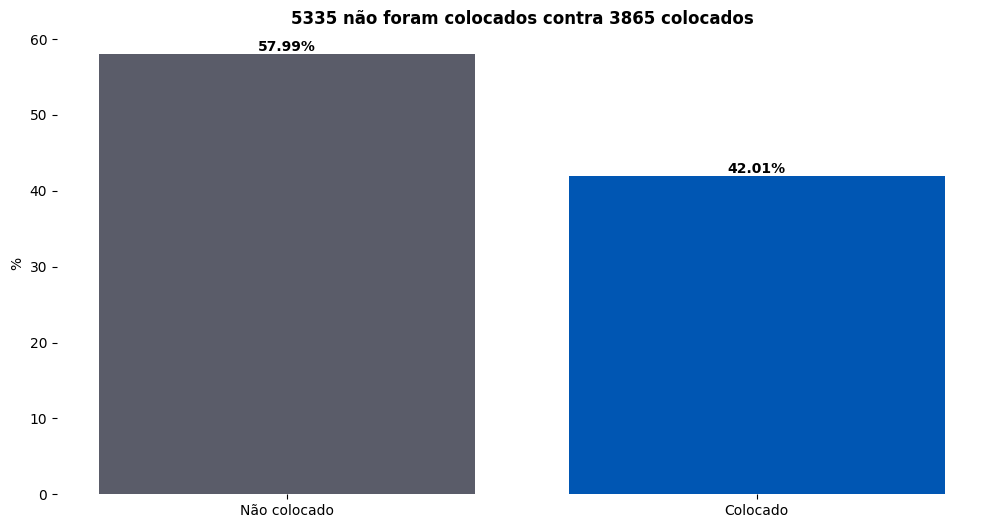

In [11]:
plt.bar(x = ['Não colocado' , 'Colocado'], height = [contagem[0]/9200*100, contagem[1]/9200*100], color = [nao_colocar_color,colocado_color])
plt.box(False)

plt.ylabel('%')
plt.text(x = 'Não colocado', y = contagem[0]/9200*100, s = f'{contagem[0]/9200*100:.2f}%', ha = 'center', va = 'bottom', fontweight = 'bold', fontsize = 10)
plt.text(x = 'Colocado', y = contagem[1]/9200*100, s = f'{contagem[1]/9200*100:.2f}%', ha= 'center', va = 'bottom', fontweight = 'bold', fontsize = 10)
plt.title(f"{contagem[0]} não foram colocados contra {contagem[1]} colocados", fontsize=12, fontweight='bold')


Quais as personalidades dos alunos? Há mais personalidades do que outras?

R: Observamos 4 tipos de personalidades diferentes. As personalidades estão numeradas de 1 a 4.

Sim, há personalidades mais populares que outras.



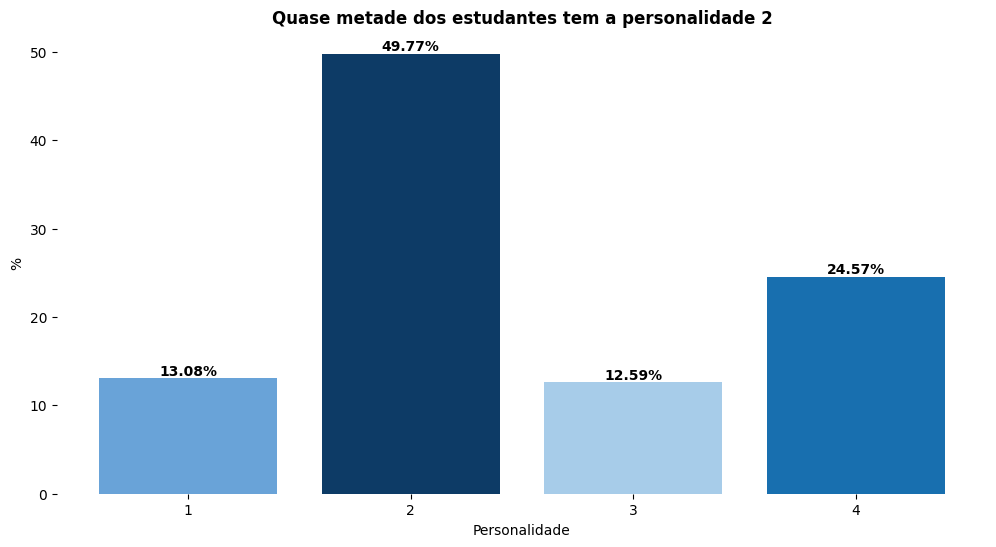

In [12]:
contagem = data['personality_type'].value_counts()
cores = ['#0D3B66', '#186FAF', '#69A3D8', '#A7CCE9']
plt.bar(contagem.index, height=contagem.values/9200 *100, color = cores )
plt.xticks([1,2,3,4])
plt.box(False)
plt.title("Quase metade dos estudantes tem a personalidade 2", fontsize=12, fontweight='bold')

plt.ylabel('%')
plt.xlabel('Personalidade')
for i,value in contagem.items():
    plt.text(x = i, y = value/9200*100, s = f"{value/9200 *100:.2f}%", ha = 'center', va = 'bottom', fontweight = 'bold')

Qual distribuição o número de aplicações segue? 

R: Aparentemente segue uma distribuição uniforme. Não há valores discrepantes. 

Text(0.5, 1.0, 'O número de aplicações segue uma distribuiçao uniforme')

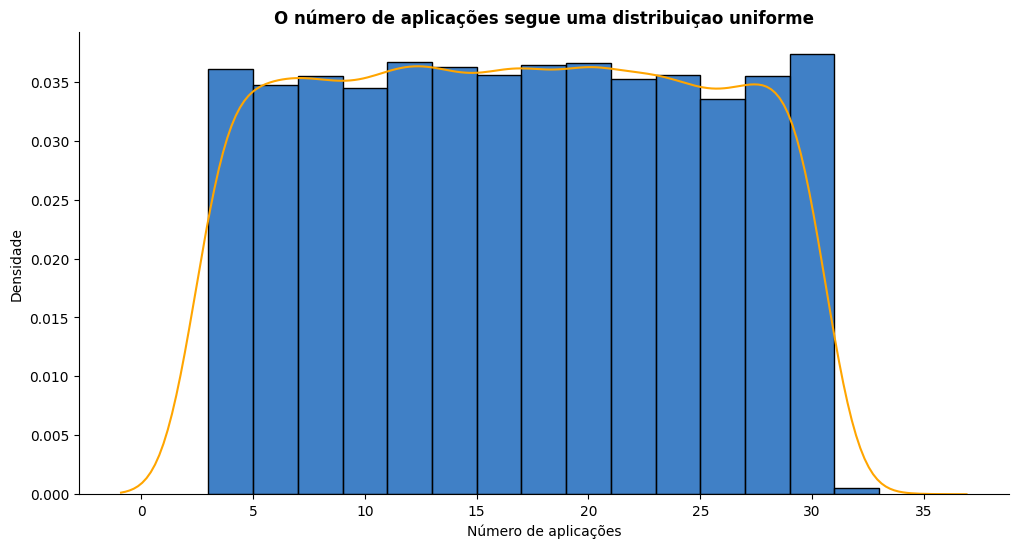

In [13]:
sns.histplot(data = data, x='n_job_applications', bins = 15, stat = 'density', color = colocado_color)
sns.kdeplot(data = data, x='n_job_applications', color =  "#FFA500")

plt.xlabel('Número de aplicações')
plt.ylabel('Densidade')
plt.title("O número de aplicações segue uma distribuiçao uniforme", fontsize=12, fontweight='bold')


Qual o comportamentos nas notas do ensino médio e ensino secundario?

R: Observamos que as notas são maiores no higher secondary quando comparadas ao secondary school.

No secondary observamos um pico de notas baixas em torno de 50 a 60 pontos e outro pico mais largo em torno de 70 a 80 pontos.

No higher observamos um pico entre 60 a 70 e outro pico entre 80 a 90.

Text(0.5, 1.0, 'Secondary School')

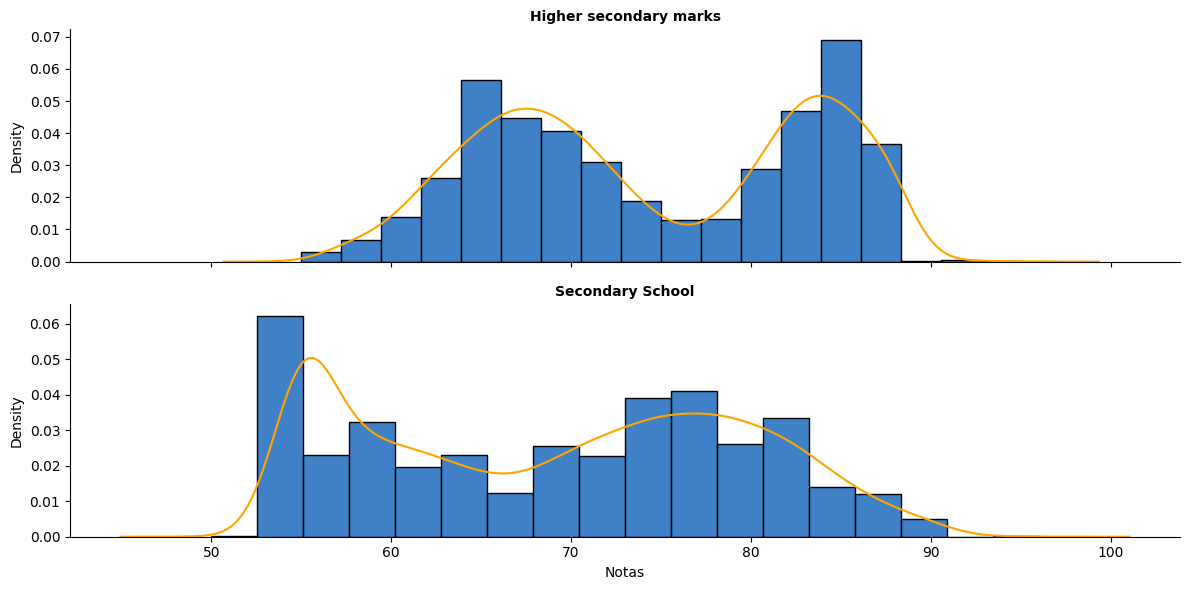

In [14]:
fig, ax = plt.subplots(2,1, tight_layout = True, sharex=True)


sns.histplot(data = data, x='hsc_marks', bins = 18, stat = 'density', ax = ax[0], color = colocado_color)
sns.kdeplot(data = data, x='hsc_marks', ax = ax[0], color =  "#FFA500")
sns.histplot(data = data, x='ssc_marks', bins = 18, stat = 'density', ax = ax[1], color = colocado_color)
sns.kdeplot(data = data, x='ssc_marks', ax = ax[1], color =  "#FFA500")


ax[1].set_xlabel('Notas')

ax[0].set_title('Higher secondary marks',fontsize=10, fontweight='bold')
ax[1].set_title('Secondary School',fontsize=10, fontweight='bold')



Os alunos estão participando de treinamentos para conseguirem uma colocação?

R: Sim, 73% dos alunos participaram do treinamento. Isso mostra alto engajamento por parte dos alunos com relação ao futuro.

In [15]:
contagem = data['placement_training'].value_counts()

print(f'{contagem['Yes']} ({contagem['Yes']/9200*100:.2f}%) participaram de treinamento\n'
      f'{contagem['No']} ({contagem['No']/9200*100:.2f}%) não participaram de treinamento')

6743 (73.29%) participaram de treinamento
2457 (26.71%) não participaram de treinamento


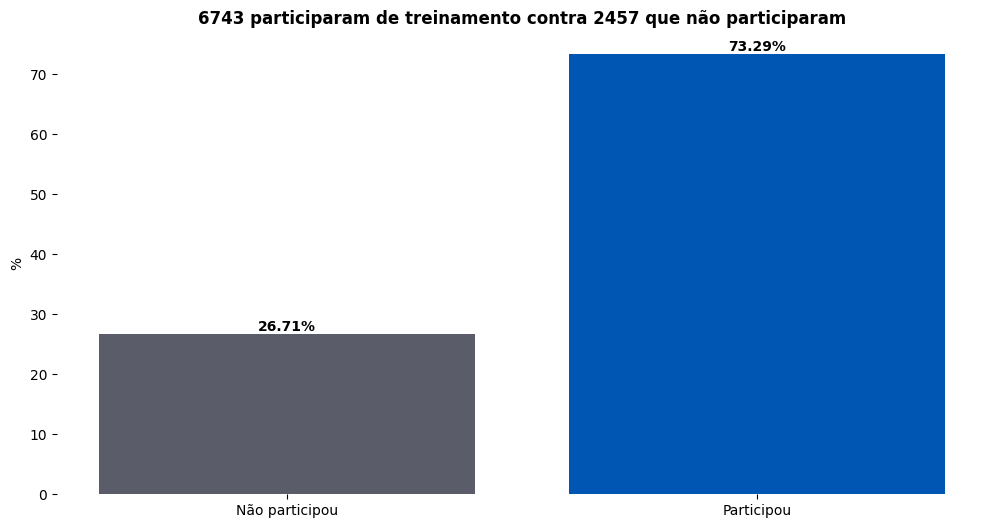

In [16]:
plt.bar(x = ['Não participou' , 'Participou'], height = [contagem['No']/9200*100, contagem['Yes']/9200*100], color = [nao_colocar_color,colocado_color])
plt.box(False)

plt.ylabel('%')
plt.text(x = 'Participou', y = contagem['Yes']/9200*100, s = f'{contagem['Yes']/9200*100:.2f}%', ha = 'center', va = 'bottom', fontweight = 'bold', fontsize = 10)
plt.text(x = 'Não participou', y = contagem['No']/9200*100, s = f'{contagem['No']/9200*100:.2f}%', ha= 'center', va = 'bottom', fontweight = 'bold', fontsize = 10)
plt.title(f"{contagem['Yes']} participaram de treinamento contra {contagem['No']} que não participaram", fontsize=12, fontweight='bold');


Os alunos estão participando de atividades extra curriculares?

R: Sim, em torno de 58% dos alunos participou de ao menos uma atividade extra curricular.

In [17]:
contagem = data['extra_curricular_activities'].value_counts()

print(f'{contagem['Yes']} ({contagem['Yes']/9200*100:.2f}%) participaram de atividades extra curriculares\n'
      f'{contagem['No']} ({contagem['No']/9200*100:.2f}%) não participaram de atividades extra curriculares')

5381 (58.49%) participaram de atividades extra curriculares
3819 (41.51%) não participaram de atividades extra curriculares


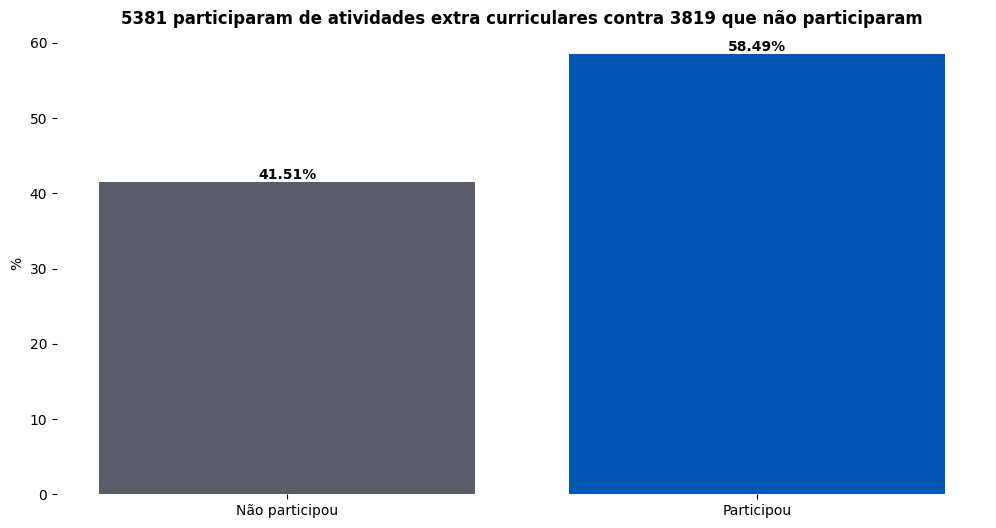

In [18]:
plt.bar(x = ['Não participou' , 'Participou'], height = [contagem['No']/9200*100, contagem['Yes']/9200*100], color = [nao_colocar_color,colocado_color])
plt.box(False)

plt.ylabel('%')
plt.text(x = 'Participou', y = contagem['Yes']/9200*100, s = f'{contagem['Yes']/9200*100:.2f}%', ha = 'center', va = 'bottom', fontweight = 'bold', fontsize = 10)
plt.text(x = 'Não participou', y = contagem['No']/9200*100, s = f'{contagem['No']/9200*100:.2f}%', ha= 'center', va = 'bottom', fontweight = 'bold', fontsize = 10)
plt.title(f"{contagem['Yes']} participaram de atividades extra curriculares contra {contagem['No']} que não participaram", fontsize=12, fontweight='bold');


Como estão as soft skills dos estudantes?

R: A maioria dos estudantes tem pontuação de soft skill razoavelmente alta. A maior pontuação observada foi de 5.28.

 Através dos quartis, observamos que a mediana corresponde a 4.4, ou seja, metade dos estudantes tem pontuação acima de 4.4.

count    9200.000000
mean        4.324291
std         0.413076
min         2.980000
25%         4.000000
50%         4.400000
75%         4.700000
max         5.280000
Name: soft_skills_rating, dtype: float64

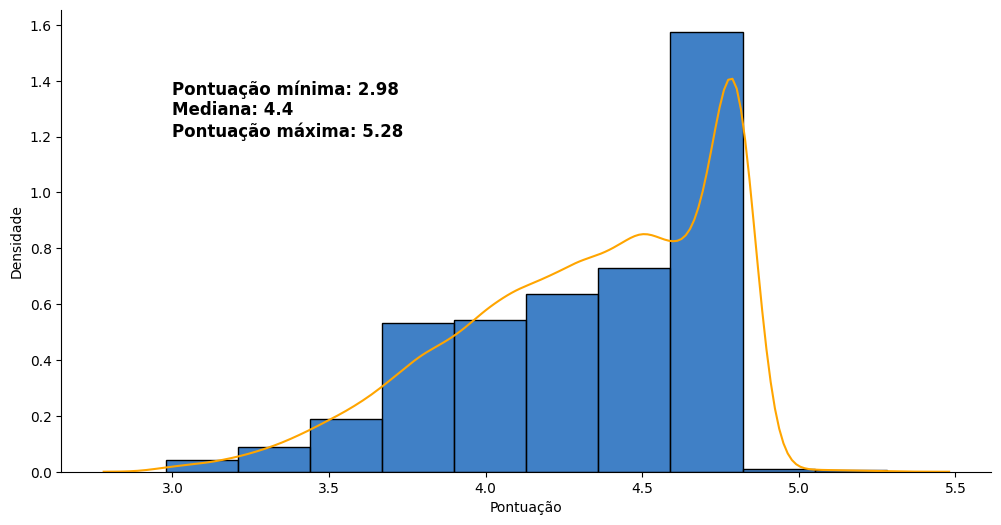

In [19]:
sns.histplot(data = data, x='soft_skills_rating', bins = 10, stat = 'density', color = colocado_color)
sns.kdeplot(data = data, x='soft_skills_rating', color =  "#FFA500")

plt.xlabel('Pontuação')
plt.ylabel('Densidade')

texto = f'Pontuação mínima: {data['soft_skills_rating'].min()}\nMediana: {data['soft_skills_rating'].median()}\nPontuação máxima: {data['soft_skills_rating'].max()}'

plt.annotate(texto, xy = (3, 1.2),fontweight = 'bold', fontsize=12)

data['soft_skills_rating'].describe().T


Como está o teste de aptidão dos alunos?

R: Na mediana os alunos tiraram 80 no teste de aptidão. Ou seja, metade deles tem pontuação acima de 80 pontos.


count    9200.000000
mean       79.448478
std         8.188742
min        59.000000
25%        73.000000
50%        80.000000
75%        87.000000
max        96.000000
Name: aptitude_test_score, dtype: float64

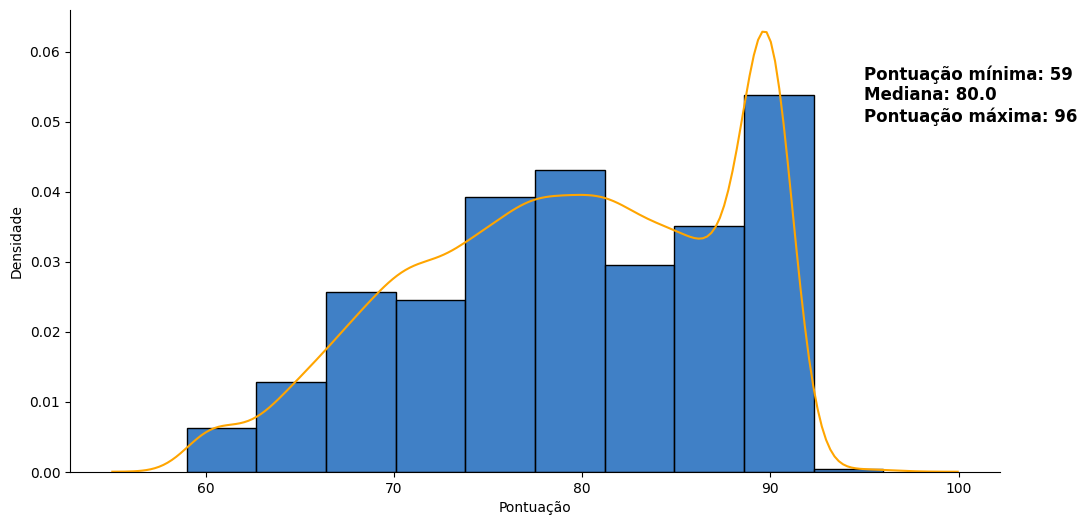

In [20]:
sns.histplot(data = data, x='aptitude_test_score', bins = 10, stat = 'density', color = colocado_color)
sns.kdeplot(data = data, x='aptitude_test_score', color =  "#FFA500")

plt.xlabel('Pontuação')
plt.ylabel('Densidade')

texto = f'Pontuação mínima: {data['aptitude_test_score'].min()}\nMediana: {data['aptitude_test_score'].median()}\nPontuação máxima: {data['aptitude_test_score'].max()}'

plt.annotate(texto, xy = (95, 0.05),fontweight = 'bold', fontsize=12)

data['aptitude_test_score'].describe().T


Os estudantes tem participando de workshops?

R: Sim, em torno de 63% tem pelo menos uma certificação. No entanto, a adesão em workshops ainda é baixa. Aproximadamante 3% dos estudantes foram no máximo em 3 workshops.  

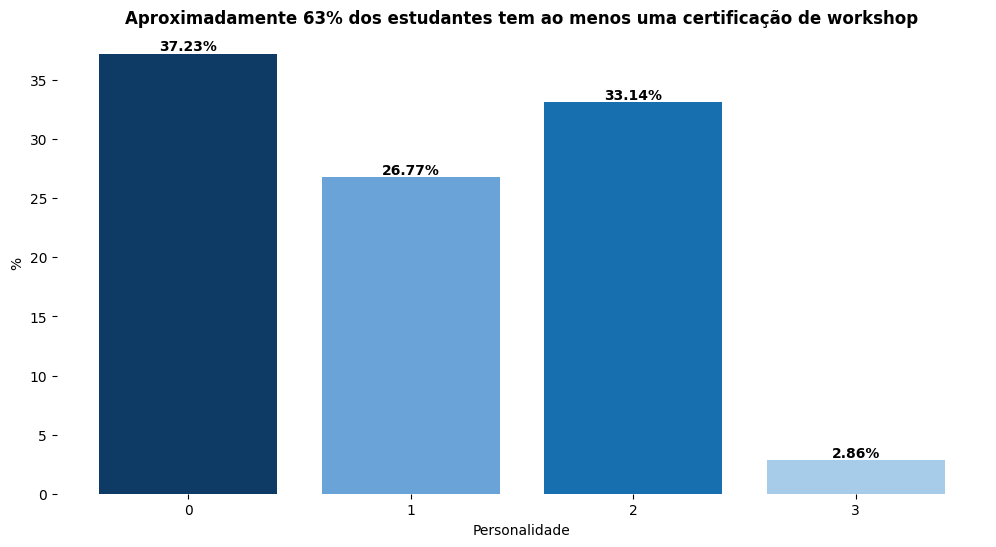

In [21]:
contagem = data['workshops_certifications'].value_counts()
cores = ['#0D3B66', '#186FAF', '#69A3D8', '#A7CCE9']
plt.bar(contagem.index, height=contagem.values/9200 *100, color = cores )
plt.xticks([0,1,2,3])
plt.box(False)
plt.title("Aproximadamente 63% dos estudantes tem ao menos uma certificação de workshop", fontsize=12, fontweight='bold')

plt.ylabel('%')
plt.xlabel('Personalidade')
for i,value in contagem.items():
    plt.text(x = i, y = value/9200*100, s = f"{value/9200 *100:.2f}%", ha = 'center', va = 'bottom', fontweight = 'bold')

Os alunos tem participado de projetos?

R: Sim, 99% dos estudantes participaram de ao menos um projeto. Os estudantes foram bem engajados em projetos, 38% deles participaram de até 3 projetos.

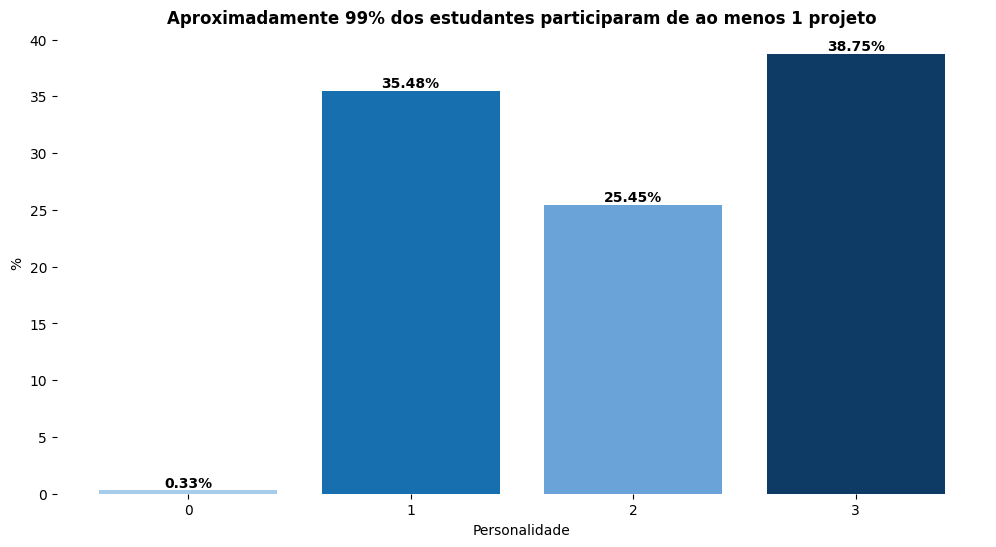

In [22]:
contagem = data['projects'].value_counts()
cores = ['#0D3B66', '#186FAF', '#69A3D8', '#A7CCE9']
plt.bar(contagem.index, height=contagem.values/9200 *100, color = cores )
plt.xticks([0,1,2,3])
plt.box(False)
plt.title("Aproximadamente 99% dos estudantes participaram de ao menos 1 projeto", fontsize=12, fontweight='bold')

plt.ylabel('%')
plt.xlabel('Personalidade')
for i,value in contagem.items():
    plt.text(x = i, y = value/9200*100, s = f"{value/9200 *100:.2f}%", ha = 'center', va = 'bottom', fontweight = 'bold')

Os estudantes estão fazendo estágio? 

R: Sim, 80% dos estudantes fizeram ao menos um estágio. No entanto, 20% , que corresponde a 1840 alunos, não fizeram nenhum estágio durante seu periodo de estudo. Perdendo assim a oportunidade de adquirir skills que vão além das salas de aula.

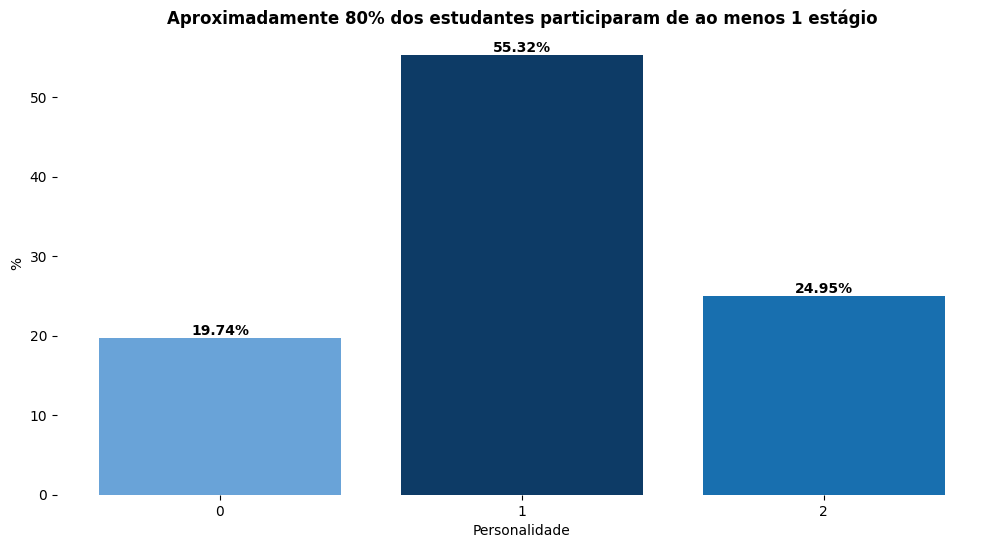

In [24]:
contagem = data['internships'].value_counts()
cores = ['#0D3B66', '#186FAF', '#69A3D8', '#A7CCE9']
plt.bar(contagem.index, height=contagem.values/9200 *100, color = cores )
plt.xticks([0,1,2])
plt.box(False)
plt.title("Aproximadamente 80% dos estudantes participaram de ao menos 1 estágio", fontsize=12, fontweight='bold')

plt.ylabel('%')
plt.xlabel('Personalidade')
for i,value in contagem.items():
    plt.text(x = i, y = value/9200*100, s = f"{value/9200 *100:.2f}%", ha = 'center', va = 'bottom', fontweight = 'bold')

Como está a média geral dos estudante?

R: Os estudantes, em média, acabam tendo uma maior dificuldade em alcançar altas pontuações no cgpa. Em mediana, os pontos ficam em torno de 7.7.

count    9200.000000
mean        7.697162
std         0.644766
min         5.890000
25%         7.400000
50%         7.700000
75%         8.200000
max         9.430000
Name: cgpa, dtype: float64

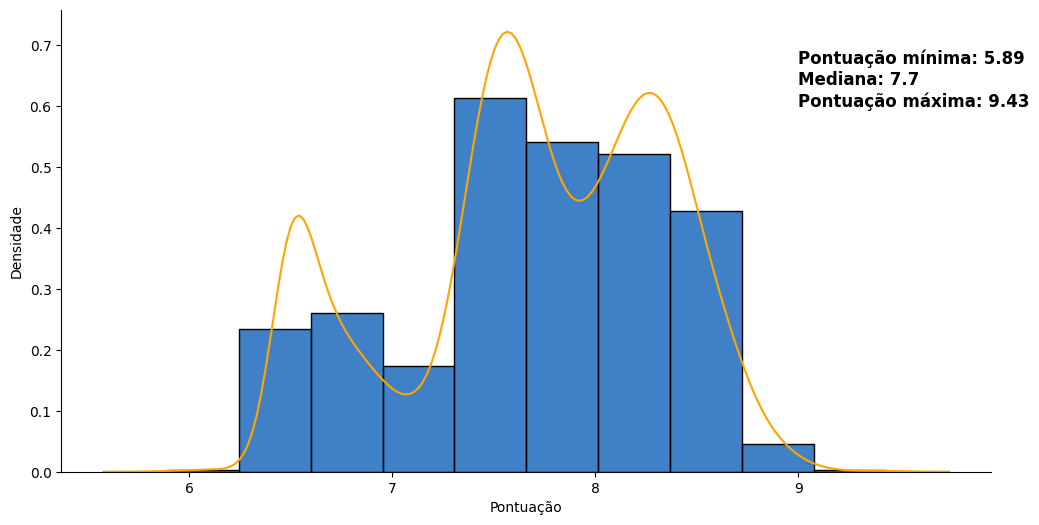

In [25]:
sns.histplot(data = data, x='cgpa', bins = 10, stat = 'density', color = colocado_color)
sns.kdeplot(data = data, x='cgpa', color =  "#FFA500")

plt.xlabel('Pontuação')
plt.ylabel('Densidade')

texto = f'Pontuação mínima: {data['cgpa'].min()}\nMediana: {data['cgpa'].median()}\nPontuação máxima: {data['cgpa'].max()}'

plt.annotate(texto, xy = (9, 0.6),fontweight = 'bold', fontsize=12)

data['cgpa'].describe().T


## Análise Multivariada

Nessa análise o nosso foco será investigar como as diferentes features dos estudantes estão associadas ao target.

Alunos com maiores notas estão colocados?

R: Temos evidências de que, na mediana, estudantes com maiores notas estão colocados. Isso se torna mais evidente quando consideramos a soma de todas as notas (cgpa + hsc + ssc). 

Além disso, não temos muitas evidencias que alunos com boas notas em ensinos primarios, também terão boas notas em ensinos mais avançados. Através do regplot e por calculos de correlação, observamos correlação fraca entre as notas ssc,hsc e cgpa.

Em suma, alunos com notas maiores são mais colocados quando comparados aos alunos com notas um pouco mais baixas. Em tese, isso é o esperado pelo senso comum.

Lembrando que isso é um comportamento mediano/médio. Na prática, observamos que alguns alunos com notas baixas também conseguiram ser colocados. Também observamos alunos com boas notas que não foram colocados. Desse modo, as notas são um fator importante, porém, sozinhas não explicam se um estudante sera colocado, pois, supomos que outros fatores também sejam considerados, como exemplo citamos as soft skills.

In [61]:
data.groupby(['placement_status'])[['cgpa','hsc_marks','ssc_marks']].median()

,cgpa,hsc_marks,ssc_marks
placement_status,,,
0,7.5,69.0,62.0
1,8.2,83.0,76.0


In [ ]:
data['total_marks'] = data['cgpa'] + data['hsc_marks'] + data['ssc_marks']

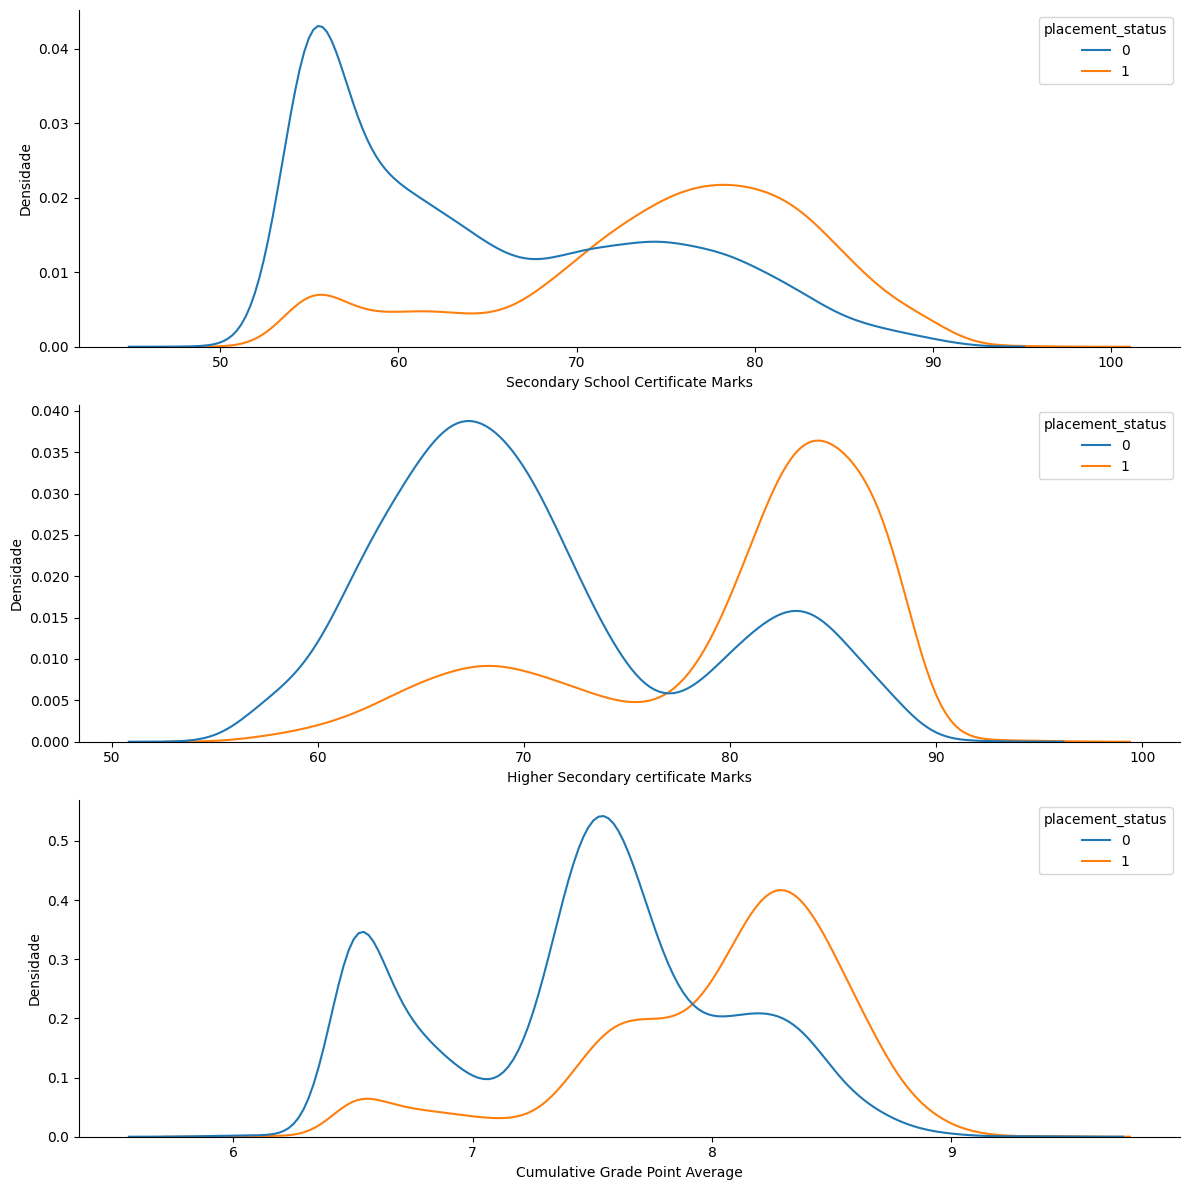

In [85]:
fig, ax = plt.subplots(3,1, tight_layout = True, figsize= (12,12))
sns.kdeplot(data = data, x='cgpa', hue='placement_status', ax = ax[2])
sns.kdeplot(data = data, x='hsc_marks', hue='placement_status', ax = ax[1])
sns.kdeplot(data = data, x='ssc_marks', hue='placement_status', ax= ax[0])

ax[2].set_xlabel('Cumulative Grade Point Average')
ax[1].set_xlabel('Higher Secondary certificate Marks')
ax[0].set_xlabel('Secondary School Certificate Marks');

ax[2].set_ylabel('Densidade')
ax[1].set_ylabel('Densidade')
ax[0].set_ylabel('Densidade');

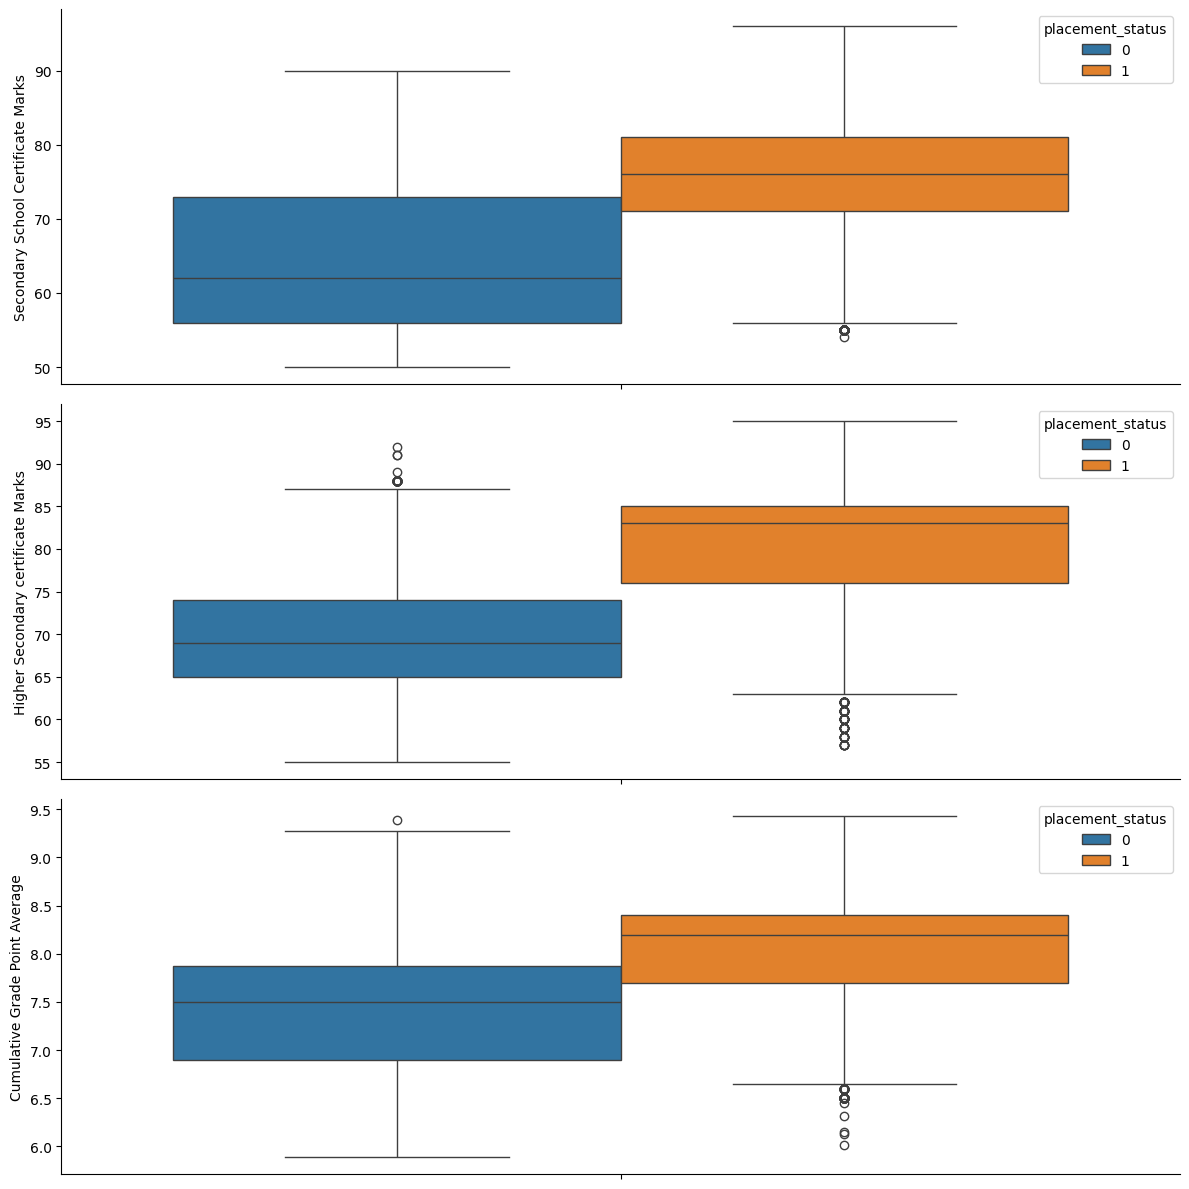

In [42]:
fig, ax = plt.subplots(3,1, tight_layout = True, figsize= (12,12))
sns.boxplot(data = data, y='cgpa', hue='placement_status', ax = ax[2])
sns.boxplot(data = data, y='hsc_marks', hue='placement_status', ax = ax[1])
sns.boxplot(data = data, y='ssc_marks', hue='placement_status', ax= ax[0])

ax[2].set_ylabel('Cumulative Grade Point Average')
ax[1].set_ylabel('Higher Secondary certificate Marks')
ax[0].set_ylabel('Secondary School Certificate Marks');

<Axes: xlabel='total_marks', ylabel='Density'>

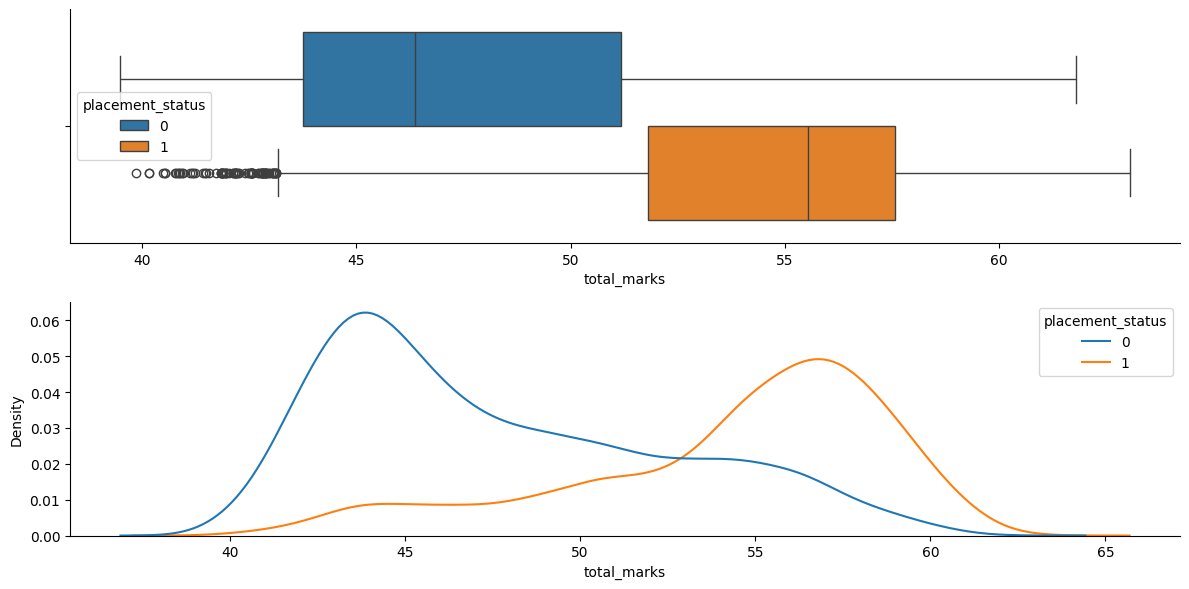

In [ ]:
fig, ax = plt.subplots(2, 1, tight_layout = True, sharex= True)

sns.boxplot(data = data, x='total_marks', hue = 'placement_status', ax = ax[0])
sns.kdeplot(data = data, x='total_marks', hue = 'placement_status', ax = ax[1])



In [73]:
data[['cgpa','hsc_marks','ssc_marks']].corr('pearson')

,cgpa,hsc_marks,ssc_marks
cgpa,1.000000,0.464917,0.400771
hsc_marks,0.464917,1.000000,0.530344
ssc_marks,0.400771,0.530344,1.000000


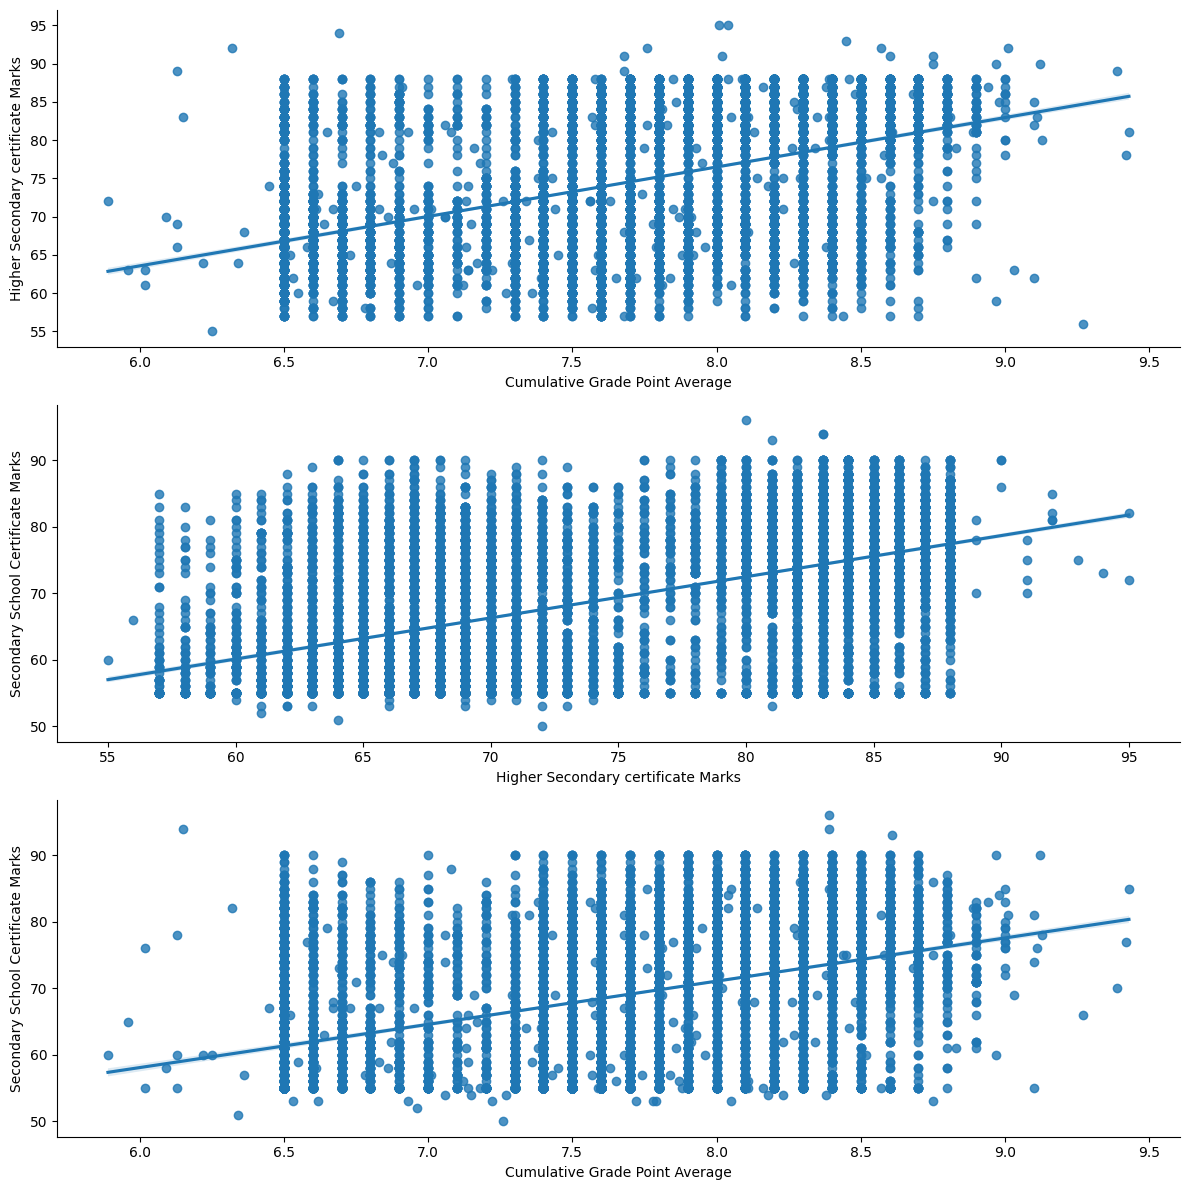

In [71]:
fig, ax = plt.subplots(3,1, tight_layout = True, figsize= (12,12))

sns.regplot(data = data, x='cgpa', y = 'hsc_marks' , ax = ax[0])
sns.regplot(data = data, x='hsc_marks', y = 'ssc_marks', ax = ax[1])
sns.regplot(data = data, x='cgpa', y = 'ssc_marks', ax= ax[2])

ax[0].set_xlabel('Cumulative Grade Point Average')
ax[1].set_xlabel('Higher Secondary certificate Marks')
ax[2].set_xlabel('Cumulative Grade Point Average');

ax[0].set_ylabel('Higher Secondary certificate Marks')
ax[1].set_ylabel('Secondary School Certificate Marks')
ax[2].set_ylabel('Secondary School Certificate Marks');

In [26]:
data.head(2)

,cgpa,internships,projects,workshops_certifications,aptitude_test_score,soft_skills_rating,extra_curricular_activities,placement_training,ssc_marks,hsc_marks,n_job_applications,personality_type,placement_status,student_id
0,8.4,2,2,0,74,4.4,Yes,No,79,85,4,2,0,4085
1,7.6,1,2,1,75,4.3,Yes,Yes,80,67,7,4,1,2992


# Curiosidades 

Esse tópico não agrega em nada o nosso estudo. Seu unico objetivo consiste em exibir curiosidades acerca do histórico dos estudantes